In [80]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
acoes = {
    # AGRO
    'acao1': 'SLCE3.SA',
    'acao2': 'AGRO3.SA',
    'acao3': 'VALE3.SA',
    'acao4': 'SMTO3.SA',
    'acao5': 'BRFS3.SA',
    
    # BANCARIO
    'acao6': 'BBAS3.SA',
    'acao7': 'ITUB4.SA',
    'acao8': 'BBDC4.SA',
    'acao9': 'SANB11.SA',
    'acao10': 'PETR4.SA',
    
    # TRANSPORTE
    'acao11': 'GOLL4.SA',
    'acao12': 'AZUL4.SA',
    'acao13': 'RAIL3.SA',
    'acao14': 'CCRO3.SA',
    'acao15': 'JSLG3.SA',
    
    # TECNOLOGICO
    'acao16': 'TOTS3.SA',
    'acao17': 'IGTI11.SA',
    'acao18': 'POSI3.SA',
    'acao19': 'LWSA3.SA',
    'acao20': 'BMOB3.SA'
}


In [82]:
tickers = {}
i = 1
for acao in acoes.values():
    tickers[f'ticker{i}'] = yf.Ticker(acao)
    i += 1


In [83]:
investimento_inicial = 1000
j = 1
datas = {}
for ticker in tickers.values():
    datas[f'data{j}'] = ticker.history(period='1y')
    j += 1

In [84]:
def ret_total(datas, data, inv_inicial):
    n_acoes = inv_inicial / datas[data].iloc[0]['Close']
    datas[data]['Valor investido'] = n_acoes * datas[data]['Close']
    ret_total = (datas[data].iloc[-1]['Valor investido'] / datas[data].iloc[0]['Valor investido'] - 1)
    return ret_total
def ret_diario(datas, data):
    ret = datas[data]['Valor investido'].pct_change()
    return ret
def desvio_padrao(datas, data):
    sigma = ret_diario(datas, data).std()
    return sigma
def sharpee(datas, data, inv_inicial):
    sharpee = (ret_total(datas, data, inv_inicial)) / (desvio_padrao(datas, data))
    return sharpee


In [85]:
#portifolio
#data 1
ret_total(datas, 'data1', 1000)
ret_diario(datas, 'data1')
desvio_padrao(datas, 'data1')
print(sharpee(datas, 'data1', 1000))
datap = pd.DataFrame()
datap['Valor investido'] = datas["data1"]['Valor investido']


-0.55077423056722


In [86]:
#correlacao portifolio com acao 1
df = pd.DataFrame()
df['portifolio'] = ret_diario(datas, 'data1')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
correlation_series = df.corr().sort_values(by='portifolio', ascending=False)['portifolio']
sharpee1 = sharpee(datas, 'data1', 1000)
last_value = correlation_series.iloc[-1]
last_row_name = correlation_series.idxmin()
portifolio = {'acoes':[acoes['acao1']]}
print(f'A acao com menor correlacao ao portifolio {portifolio["acoes"]} é: \n{last_row_name} com valor {last_value:.4f}.')
print(f'sharpee do portifolio é {sharpee1}')


A acao com menor correlacao ao portifolio ['SLCE3.SA'] é: 
acao10 com valor -0.0228.
sharpee do portifolio é -0.55077423056722


In [87]:
#correlacao portifolio com acao 1 e 10
df['portifolio'] += ret_diario(datas, 'data10')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
correlation_series = df.corr().sort_values(by='portifolio', ascending=False)['portifolio']
portifolio['acoes'].append(acoes['acao10'])
last_value = correlation_series.iloc[-1]
last_row_name = correlation_series.idxmin()
datap['Valor investido'] += datas["data10"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee2 = sharpep
print(f'A acao com menor correlacao ao portifolio {portifolio} é: \n{last_row_name} com valor {last_value:.4f}.')
print(f'sharpee do portifolio é {sharpee2}')


A acao com menor correlacao ao portifolio {'acoes': ['SLCE3.SA', 'PETR4.SA']} é: 
acao14 com valor 0.1468.
sharpee do portifolio é 37.74033666142243


In [88]:
#portifolio com acao 1, 10, 14
df['portifolio'] += ret_diario(datas, 'data14')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
correlation_series = df.corr().sort_values(by='portifolio', ascending=False)['portifolio']
portifolio['acoes'].append(acoes['acao14'])
last_value = correlation_series.iloc[-1]
last_row_name = correlation_series.idxmin()
datap['Valor investido'] += datas["data14"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee3 = sharpep
print(f'A acao com menor correlacao ao portifolio {portifolio} é: \n{last_row_name} com valor {last_value:.4f}.')
print(f'sharpee do portifolio é {sharpee3}')

A acao com menor correlacao ao portifolio {'acoes': ['SLCE3.SA', 'PETR4.SA', 'CCRO3.SA']} é: 
acao5 com valor 0.2378.
sharpee do portifolio é 34.89165614538286


In [89]:
#portifolio com acao 1, 10, 14, 5
df['portifolio'] += ret_diario(datas, 'data5')
for k in range(1,21):
    ret_total(datas, f'data{k}', 1000)
    df[f'acao{k}'] = ret_diario(datas, f'data{k}')
correlation_series = df.corr().sort_values(by='portifolio', ascending=False)['portifolio']
portifolio['acoes'].append(acoes['acao5'])
datap['Valor investido'] += datas["data5"]['Valor investido']
retp = datap['Valor investido'].pct_change()
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)
sigmap = retp.std()
sharpep = ret_totalp/sigmap
sharpee4 = sharpep
print(f'O portifolio final é composto pelas acoes: {portifolio["acoes"]}')
print(f'sharpee do portifolio é {sharpee4}')


O portifolio final é composto pelas acoes: ['SLCE3.SA', 'PETR4.SA', 'CCRO3.SA', 'BRFS3.SA']
sharpee do portifolio é 50.05202760149369


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\felip\AppData\Local\Temp\ipykernel_20844\2842298736.py:6: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Valor (R\$)')


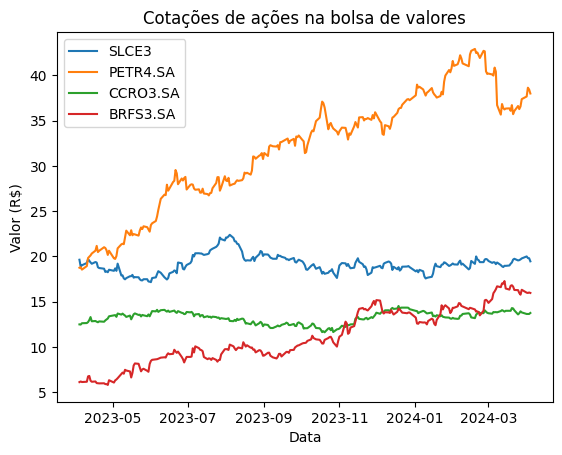

In [90]:
plt.figure()
plt.plot(datas['data1']['Close'], label='SLCE3')
plt.plot(datas['data10']['Close'], label='PETR4.SA')
plt.plot(datas['data14']['Close'], label='CCRO3.SA')
plt.plot(datas['data5']['Close'], label='BRFS3.SA')
plt.ylabel('Valor (R\$)')
plt.title('Cotações de ações na bolsa de valores')
plt.xlabel('Data')
plt.legend()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
C:\Users\felip\AppData\Local\Temp\ipykernel_20844\3316904578.py:21: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Valor (R\$)')


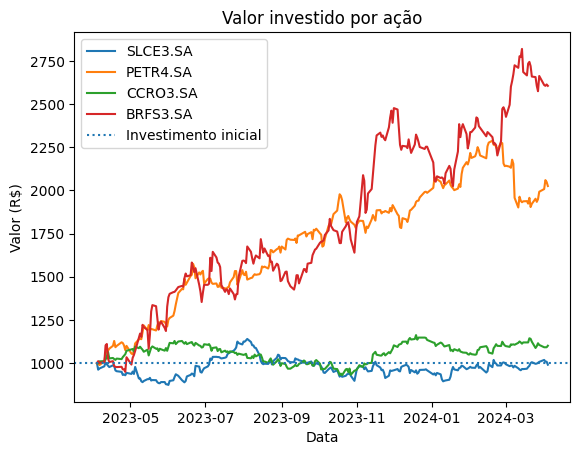

In [91]:
investimento_inicial = 1000 # reais

n_acoes1 = investimento_inicial / datas['data1'].iloc[0]['Close']
datas['data1']['Valor investido'] = n_acoes1 * datas['data1']['Close']

n_acoes2 = investimento_inicial / datas['data10'].iloc[0]['Close']
datas['data10']['Valor investido'] = n_acoes2 * datas['data10']['Close']

n_acoes3 = investimento_inicial / datas['data14'].iloc[0]['Close']
datas['data14']['Valor investido'] = n_acoes3 * datas['data14']['Close']

n_acoes4 = investimento_inicial / datas['data5'].iloc[0]['Close']
datas['data5']['Valor investido'] = n_acoes4 * datas['data5']['Close']

plt.figure()
plt.plot(datas['data1']['Valor investido'], label='SLCE3.SA')
plt.plot(datas['data10']['Valor investido'], label='PETR4.SA')
plt.plot(datas['data14']['Valor investido'], label='CCRO3.SA')
plt.plot(datas['data5']['Valor investido'], label='BRFS3.SA')
plt.axhline(investimento_inicial, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido por ação')
plt.xlabel('Data')
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\felip\AppData\Local\Temp\ipykernel_20844\2122247977.py:4: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Valor (R\$)')


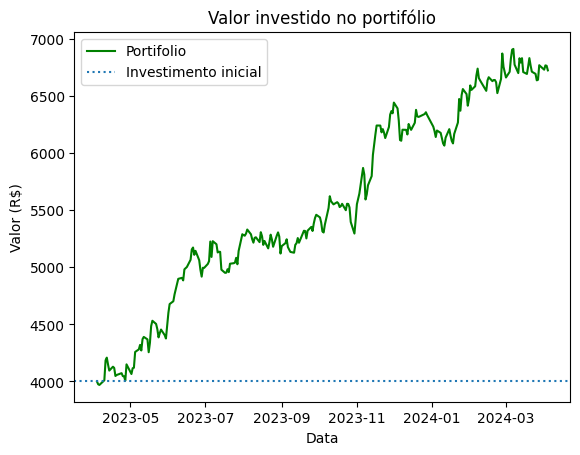

In [92]:
plt.figure()
plt.plot(datap['Valor investido'],'g',label='Portifolio')
plt.axhline(investimento_inicial*4, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido no portifólio')
plt.xlabel('Data')
plt.legend()
plt.show()

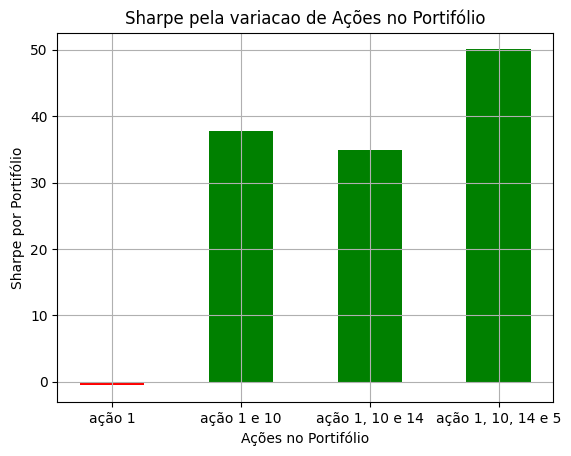

In [93]:
dados = [sharpee1, sharpee2, sharpee3, sharpee4]
acoes_ = ['ação 1', 'ação 1 e 10', 'ação 1, 10 e 14', 'ação 1, 10, 14 e 5']
sharp_df = pd.DataFrame()
sharp_df['sharpe'] = dados
sharp_df['acoes'] = acoes
c = ['red' if value < 0 else 'green' for value in dados]
plt.bar(acoes_, dados, color = c, width=0.5)
plt.xlabel('Ações no Portifólio')
plt.ylabel('Sharpe por Portifólio')
plt.title('Sharpe pela variacao de Ações no Portifólio')
plt.grid()